## This Jupyter file is used for Lending Club Case study - doing EDA analysis on data set to arrive at lending decision analysis

## 1) Add All Libraries to be imported 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")


## 2) Lets do basic study of data set by loading same 

In [2]:
loan=pd.read_csv('./loan.csv', low_memory=False)  # low _memory= false to avoid loading error on finding dtypes

In [3]:
loan.shape

(39717, 111)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 3) Start with Data Cleaning aligned with needed columns of importance 

### <span style='color:blue'> a) Check for columns with null values and can be removed </span>

In [5]:
print('column which has no values at all and can be removed :\n ')
useless_col=[]
for col in loan.columns:
    totalNan=loan[col].isna().sum()
    if totalNan == len(loan):
        useless_col.append(col)
print (useless_col)
print('\n Total useless columns: ' , len(useless_col))


column which has no values at all and can be removed :
 
['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'tot

### <span style='color:blue'> b) Drop null value columns </span>

In [6]:
for col in useless_col:
    loan.drop(col,axis=1,inplace=True)

### <span style='color:blue'> c) Check for columns with all zero value </span>

In [7]:
print('column which has no values at all and can be removed :\n ')
zero_col=[]
for col in loan.columns:
    if (loan[col] == 0).all():
        zero_col.append(col)
print (zero_col)
print('\n Total useless columns with zero value: ' , len(zero_col))

column which has no values at all and can be removed :
 
['acc_now_delinq', 'delinq_amnt']

 Total useless columns with zero value:  2


###  <span style='color:blue'> d) Drop all columns with all zero values and zero is not a useful analysis value </span>

In [8]:
for col in zero_col:
    loan.drop(col,axis=1,inplace=True)


## e) Check for all columns which has either 0 or NaN value only

In [9]:
print('column which has either 0 or no values at all and can be removed :\n ')
zeroNan_col=[] 
for col in loan.columns:
    sum=(loan[col] == 0).sum() + (loan[col].isna().sum())
    if sum == len(loan):
        zeroNan_col.append(col)
print (zeroNan_col)
print('\n Total useless columns with zero value or only Nan values: ' , len(zeroNan_col))


column which has either 0 or no values at all and can be removed :
 
['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']

 Total useless columns with zero value or only Nan values:  3


## f) Drop all columns with all zero or NaN values and zero is not a useful analysis value

In [10]:
for col in zeroNan_col:
    loan.drop(col,axis=1,inplace=True)

In [11]:
loan.shape

(39717, 52)

## g) Check for all Columns which has constant data and add no meaning or impact 

In [12]:
constantcol=[]
for col in loan.columns:
    if loan[col].nunique() <= 1:
        constantcol.append(col)
print (constantcol)
print('\n Total columns with constant value adding no additional benefit : ',len(constantcol))

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type']

 Total columns with constant value adding no additional benefit :  4


## h) Drop all columns with constant value

In [13]:
for col in constantcol:
    loan.drop(col,axis=1,inplace=True)

In [14]:
print('\n Total columns with data:', len(loan.columns) - len(zeroNan_col))


 Total columns with data: 45


## i) Convert  variables with year/month to month-year format instead of string

In [15]:
loan['issue_d'].describe()

count      39717
unique        55
top       Dec-11
freq        2260
Name: issue_d, dtype: object

In [16]:
loan['issue_d']=loan['issue_d'].apply(lambda x: str(x).replace("-","-20"))
loan['issue_d']=pd.to_datetime(loan['issue_d'])
loan['issue_d'].head(4)

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [17]:
loan['last_pymnt_d']=loan['last_pymnt_d'].apply(lambda x: str(x).replace("-","-20"))
loan['last_pymnt_d']=pd.to_datetime(loan['last_pymnt_d'])
loan['last_pymnt_d'].head(4)

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [18]:
print (loan['earliest_cr_line'].describe())
print (loan['next_pymnt_d'].value_counts())
# looks like year to be considered as per data is 2016 , so any year 0-16 in column is 20xx
# and others are all 19xx

count      39717
unique       526
top       Nov-98
freq         370
Name: earliest_cr_line, dtype: object
Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64


In [19]:
loan['earliest_cr_line']=loan['earliest_cr_line'].apply(lambda x: str(x).replace("-","-20") if int(str(x).split('-')[1]) <=16 else str(x).replace("-","-19"))

In [20]:
loan['earliest_cr_line']=pd.to_datetime(loan['earliest_cr_line'])
loan['earliest_cr_line'].head(4)
# later we may need this conversion to calculate the nuber of months credit line exists for the member

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
Name: earliest_cr_line, dtype: datetime64[ns]

## j) Rename some columns for clarity and easy finding

In [21]:
loan.rename(columns={'total_acc':'totalcreditlines','open_acc': 'opencreditlines','revol_util' : 'creditUtilizationRatio','dti' : 'debtToIncomeRatio'},inplace=True)

In [22]:
loan.loc[:,['id','member_id','creditUtilizationRatio','opencreditlines','debtToIncomeRatio']].head(5)

,id,member_id,creditUtilizationRatio,opencreditlines,debtToIncomeRatio
0,1077501,1296599,83.70%,3,27.65
1,1077430,1314167,9.40%,3,1.00
2,1077175,1313524,98.50%,2,8.72
3,1076863,1277178,21%,10,20.00
4,1075358,1311748,53.90%,15,17.94


## k) Check for similar value columns and drop useless ones

In [23]:
print (loan['title'].value_counts().head(5))
print (loan['purpose'].value_counts().head(5))
# looks like title and purpose and descr are similar , purpose is more cleaner and well doucmented , lets drop desc,title

Debt Consolidation         2184
Debt Consolidation Loan    1729
Personal Loan               659
Consolidation               517
debt consolidation          505
Name: title, dtype: int64
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
Name: purpose, dtype: int64


In [24]:
loan['desc'].value_counts().head(10)

                                  210
Debt Consolidation                  8
Camping Membership                  6
Personal Loan                       3
credit card consolidation           3
personal loan                       3
credit card debt consolidation      3
debt consolidation                  2
Debt consolidation                  2
consolidate debt                    2
Name: desc, dtype: int64

In [25]:
## Drop unwanted duplicate columns  - desc. title

In [26]:
loan.drop('title',axis=1,inplace=True)
loan.drop('desc',axis=1,inplace=True)

## l) Drop unwanted columns although they have values but no point holding them in data set

In [27]:
# Some columns such as url , emp title , etc have no value in our analysis
loan.drop('url',axis=1,inplace=True)
loan.drop('emp_title',axis=1,inplace=True)

## m) Cleaning data types - removing special characters for variables which may be used for univariate or bivariate analysis

##     Also cleaning Important variables used for calculating FICO score 

In [28]:
# Remove % symbol from creditUtlizationRation
loan['creditUtilizationRatio']=loan['creditUtilizationRatio'].apply(lambda x: str(x).replace("%",""))
loan['creditUtilizationRatio']=loan['creditUtilizationRatio'].apply(lambda x: float(x))

In [29]:
# To study employment years , remove years and other characters
char_to_replace=[' year','s','+','< ']
for i in char_to_replace:
    loan['emp_length']=loan['emp_length'].apply(lambda x: str(x).replace(i,""))
loan['emp_length']=loan['emp_length'].apply(lambda x: float(x))

In [30]:
print ("Number of entries with months since last delinquency is not known or NaN :", len(loan[loan['mths_since_last_delinq'].isna()]))
print ("Number of entries with zero delinquency for last 2 years :" , len(loan[loan['delinq_2yrs'] == 0]))

Number of entries with months since last delinquency is not known or NaN : 25682
Number of entries with zero delinquency for last 2 years : 35405


In [31]:
# since we need certain variables for derived metrics calculation , we need to see if they have some NaN values 
# and if we need to replace them.

# one such column is mths_since_last_delinq , will be used to find payment history factor for FICO score.
loan[loan['mths_since_last_delinq'].isna()].loc[:,['delinq_2yrs']].value_counts()
# it is seen that mths_since_last_delinq being NaN has delinq_2yrs as all zero , so we can safely replace NaN to 24 months


delinq_2yrs
0              25682
dtype: int64

In [32]:
# to fill atleast 24 months since last delinq instead of NaN since delinq_2yrs is zero
loan['mths_since_last_delinq'].fillna(24,inplace=True)

## 4) Copy Cleaned data set to new one.

In [33]:
cleaned_loan = loan

## 5) Derived Metrics from Loan data set and also create subset dataset for analysis 

## a) prepare annual income and loan amount  buckets  for later analysis

In [34]:
##Preparebuckets for the Annual income using pd.cut
bins = [0,20000,40000,60000,80000,100000,1000000,np.inf]
labels = ["'0-20k'","'20k-40k'","'40k-60k'","'60k-80k'","'80k-100k'","100k-1M","'>1M'"]
cleaned_loan['annual_inc_bucket'] = pd.cut(cleaned_loan['annual_inc'], bins=bins, labels=labels)

In [35]:
##Prepare buckets for the loan amount using pd.cut
bins = [0,5000,10000,15000,20000,25000,30000,np.inf]
labels = ["'0-5k'","'5k-10k'","'10k-15k'","'15k-20k'","'20k-25k'","25k-30k","'>30k'"]
cleaned_loan['loan_amnt_bucket'] = pd.cut(cleaned_loan['loan_amnt'], bins=bins, labels=labels)

## b) prepare loan duration in months

In [36]:
cleaned_loan['loandurationmonths']= cleaned_loan['total_pymnt']/cleaned_loan['installment']

## c) calculate credit history length

In [37]:
print (cleaned_loan['next_pymnt_d'].value_counts())
# month 6 and year 2016 is used to calculated history length in months.

cleaned_loan['creditHistoryLength']=6 - pd.DatetimeIndex(cleaned_loan['earliest_cr_line']).month + 12*(2016 - pd.DatetimeIndex(cleaned_loan['earliest_cr_line']).year)

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64


## d) Credit Score Calculation - Business Derived Metrics 

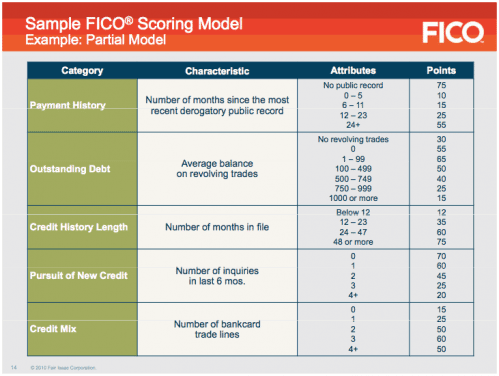

## Lets start Calculating Credit score range for each category and keep adding them to total Credit SCORE

## Category : Credit Mix for Credit Score  - impacts 10% of Score

In [38]:
cleaned_loan['CreditScore']=cleaned_loan['opencreditlines'].apply(lambda x: 25 if x == 0 else (35 if x == 1 else (60 if x ==2 else (75 if x == 3 else 60))))

## Category : Pursuit of new credit for Credit  Score - impacts 10% of Score

In [39]:
cleaned_loan['CreditScore']=cleaned_loan['CreditScore'] + cleaned_loan['inq_last_6mths'].apply(lambda x: 100 if x == 0 else (70 if x == 1 else (35 if x ==2 else (15 if x == 3 else 10))))

## Category : Credit History Length for Credit Score - impacts 15% of Score

In [40]:
cleaned_loan['CreditScore']=cleaned_loan['CreditScore'] + cleaned_loan['creditHistoryLength'].apply(lambda x: 12 if x < 100 else (35 if x >=100 and x <= 150 else (65 if x >=150 and x<=300 else 85)))

## Category : Payment and Bad reference history for Credit Score - impacts 35% of Score

In [41]:
# since we use months since last record for finding payment history , lets see his validaty of values
# and if we have enough values 
print (len(cleaned_loan[cleaned_loan['mths_since_last_record'].isna()]))
# and we see if it is of very high value whihc means , not valid to use for payment history 
# no point filling naN with zero here, since zero for mths_since_last_record is very good history

36931


In [42]:
# lets see number of public records and public records bandkruptcies.
print (len(cleaned_loan[cleaned_loan['pub_rec'].isna()]))
print (len(cleaned_loan[cleaned_loan['pub_rec_bankruptcies'].isna()]))
# it makes sense to use public record entries.

0
697


In [43]:
cleaned_loan['CreditScore']=cleaned_loan['CreditScore'] + cleaned_loan.apply(lambda x: 150 if x['pub_rec'] == 0 else (10 if x['pub_rec'] >= 5 else(15 if x['pub_rec'] >= 3 and x['pub_rec'] < 5 else (35 if x['pub_rec'] > 1 and x['pub_rec'] < 3 else 45 ) ) ), axis=1)

In [44]:
cleaned_loan['CreditScore']=cleaned_loan['CreditScore'] + cleaned_loan['mths_since_last_delinq'].apply(lambda x: 10 if x <= 5 else (20 if x >=6 and x <= 11 else (40 if x >=12 and x<=23 else (55 if x>= 24 and x<= 60 else 100 ) )))

## Category : Outstanding Debt for Credit Score - impacts 30% of Score

In [45]:
## lets analyse credit utization ratio or revolving line utlization rate to find the range for mapping to FICO score
# a good credit utilization score whihc impacts FICO ius around 15 to 30%
cleaned_loan['creditUtilizationRatio'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: creditUtilizationRatio, dtype: float64

In [46]:
cleaned_loan['CreditScore']=cleaned_loan['CreditScore'] + cleaned_loan['creditUtilizationRatio'].apply(lambda x: 180 if x <= 0 and x>= 15 else (140 if x >=16 and x <= 30 else (90 if x >=31 and x<=50 else (25 if x>= 51 and x<= 75 else 10 ) )))

In [47]:
cleaned_loan.loc[:,['id','member_id','totalcreditlines','opencreditlines','inq_last_6mths','creditHistoryLength','mths_since_last_record','pub_rec','pub_rec_bankruptcies','mths_since_last_delinq','creditUtilizationRatio','CreditScore']].head(10)

,id,member_id,totalcreditlines,opencreditlines,inq_last_6mths,creditHistoryLength,mths_since_last_record,pub_rec,pub_rec_bankruptcies,mths_since_last_delinq,creditUtilizationRatio,CreditScore
0,1077501,1296599,9,3,1,377,NaN,0,0.0,24.0,83.7,445
1,1077430,1314167,4,3,5,206,NaN,0,0.0,24.0,9.4,365
2,1077175,1313524,10,2,2,175,NaN,0,0.0,24.0,98.5,375
3,1076863,1277178,37,10,1,244,NaN,0,0.0,35.0,21.0,540
4,1075358,1311748,38,15,0,245,NaN,0,0.0,38.0,53.9,455
5,1075269,1311441,12,9,3,139,NaN,0,0.0,24.0,28.3,455
6,1069639,1304742,11,7,1,131,NaN,0,0.0,24.0,85.6,380
7,1072053,1288686,4,4,2,113,NaN,0,0.0,24.0,87.5,345
8,1071795,1306957,13,11,2,146,NaN,0,0.0,24.0,32.6,425
9,1071570,1306721,3,2,0,141,NaN,0,0.0,24.0,36.5,490


## e) Define CreditScore bucket Ranges and derive same for easy analysis .

In [48]:
##Preparebuckets for the Annual income using pd.cut
#bins = [0,300,500,700,1000]
#labels = ["'0-300'","'300-500'","'500-700'","'700-1000'"]
cleaned_loan['CreditScoreBucket']=cleaned_loan.apply(lambda x: "0-300" if x['CreditScore'] >= 0 and x['CreditScore'] <= 300 else("300-400" if x['CreditScore'] > 300 and x['CreditScore'] <= 400 else ("400-500" if x['CreditScore'] > 400 and x['CreditScore'] <= 500 else ("500-600" if x['CreditScore'] > 500 and x['CreditScore'] <= 600 else("600-700" if x['CreditScore'] > 600 and x['CreditScore'] <= 700 else "700-1000")) )),axis=1)

In [49]:
# lets seperate out charged off and paid off loans to study those.
chargedoff_loan=cleaned_loan[cleaned_loan['loan_status'] == 'Charged Off']
chargedoff_loan.shape
paidoff_loan=cleaned_loan[cleaned_loan['loan_status'] == 'Fully Paid']

## 6) Univariate  analysis 

In [50]:
# lets analyse High range of FICO score
print ('Credit Score Analysis and data range :' , cleaned_loan['CreditScore'].describe())
print ('\nCredit Score Analysis for charged off loans : ' , chargedoff_loan['CreditScore'].describe())
Q1 = cleaned_loan['CreditScore'].quantile(0.25)
Q3 = cleaned_loan['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
print('\nIQR Range for Credit Score:', IQR)
print('\nTop Fence of Credit score Range :', len(cleaned_loan[cleaned_loan['CreditScore'] < (Q1 - 1.5 * IQR)]))
print('\nBottom Fence of Credit Score Range :', len(cleaned_loan[cleaned_loan['CreditScore'] > (Q3 + 1.5* IQR)]))


Credit Score Analysis and data range : count    39717.000000
mean       445.545157
std         63.350174
min        185.000000
25%        410.000000
50%        440.000000
75%        490.000000
max        650.000000
Name: CreditScore, dtype: float64

Credit Score Analysis for charged off loans :  count    5627.000000
mean      431.435934
std        63.734234
min       185.000000
25%       390.000000
50%       430.000000
75%       470.000000
max       635.000000
Name: CreditScore, dtype: float64

IQR Range for Credit Score: 80.0

Top Fence of Credit score Range : 371

Bottom Fence of Credit Score Range : 103


In [51]:
# Lets remove outliers outside fence of FICO score and analyse further with other variables

revised_loan=cleaned_loan[cleaned_loan['CreditScore'] >= (Q1 - 1.5 * IQR)]
revised_loan=revised_loan[revised_loan['CreditScore'] <= (Q3 + 1.5* IQR)]
revised_chargedOffloan=revised_loan[revised_loan['loan_status'] == 'Charged Off']
revised_paidOffloan=revised_loan[revised_loan['loan_status'] == 'Fully Paid']
revised_loan.shape

(39243, 50)

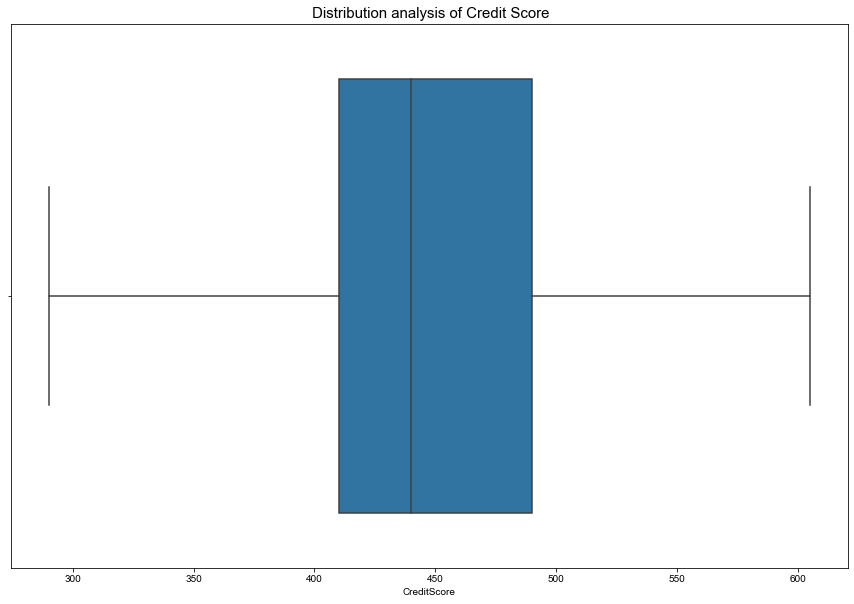

In [52]:
plt.figure(figsize=[15,10])
sns.boxplot(revised_loan['CreditScore'])
sns.set(font_scale=2) # font size 2
plt.title(" Distribution analysis of Credit Score" , fontsize=15)
plt.show()

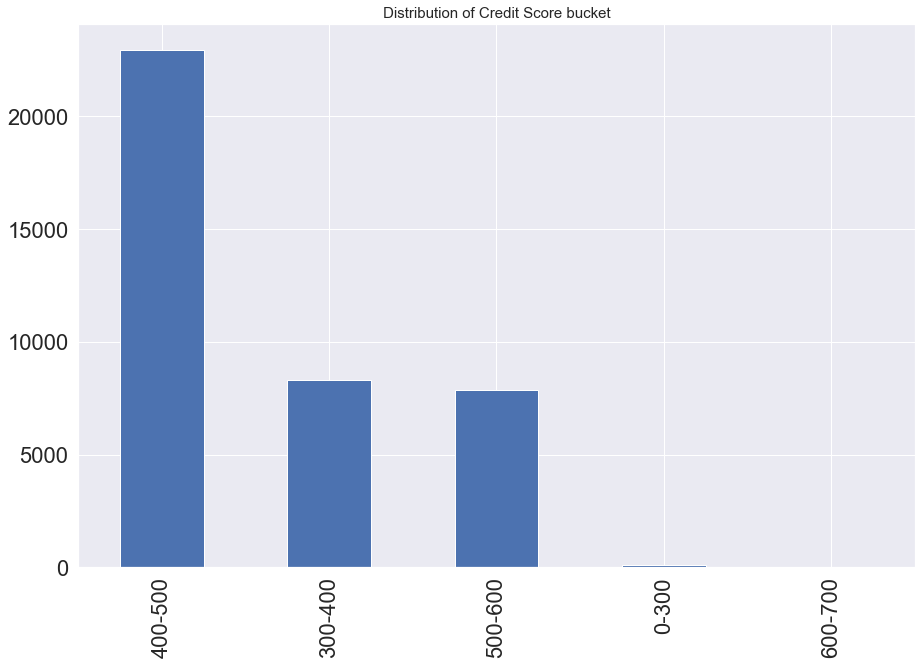

In [53]:
# FICOScore bucket plot in over all loan data set 
plt.figure(figsize=[15,10])
revised_loan['CreditScoreBucket'].value_counts().plot.bar()
plt.title(" Distribution of Credit Score bucket " , fontsize=15)
plt.show()

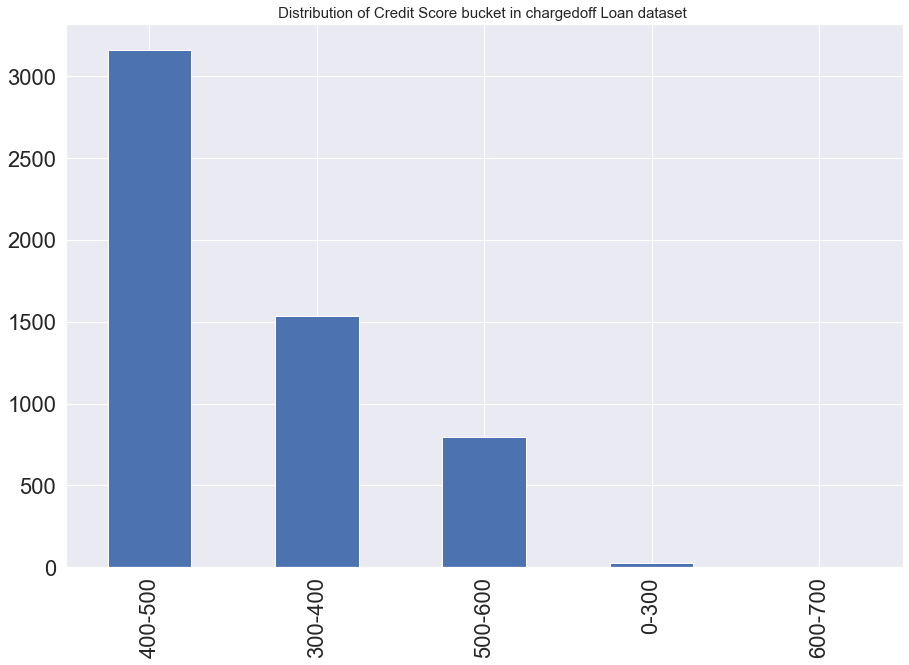

In [54]:
# FICOScore bucket plot in over chargedoff entries of data set 
plt.figure(figsize=[15,10])
revised_chargedOffloan['CreditScoreBucket'].value_counts().plot.bar()
plt.title(" Distribution of Credit Score bucket in chargedoff Loan dataset  " , fontsize=15)
plt.show()

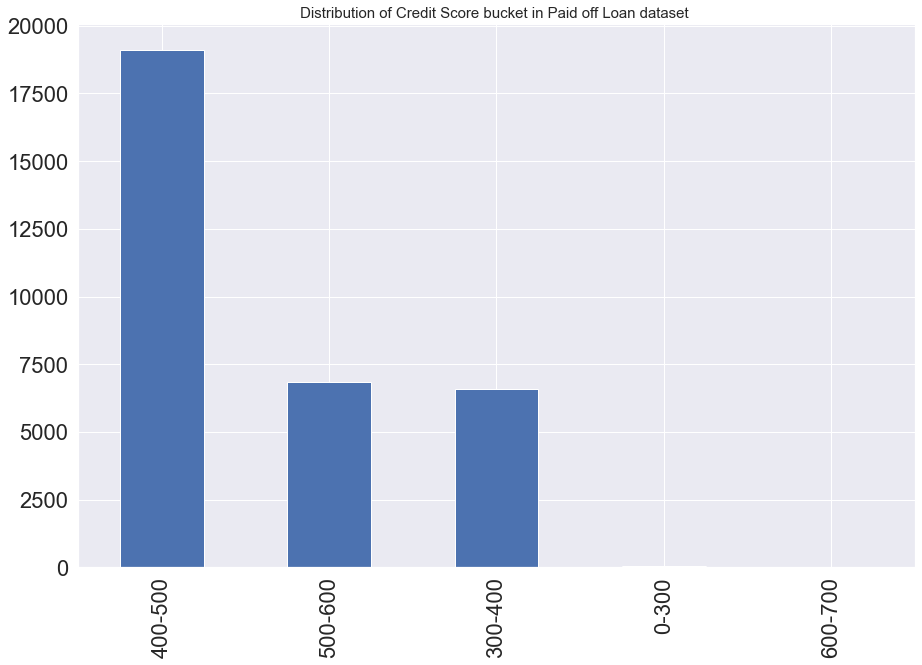

In [55]:
# FICOScore bucket plot in over paidoff entries of data set 
plt.figure(figsize=[15,10])
revised_paidOffloan['CreditScoreBucket'].value_counts().plot.bar()
plt.title(" Distribution of Credit Score bucket in Paid off Loan dataset  " , fontsize=15)
plt.show()

In [56]:
# top 5 Percentage of title or loan reasons for all loans Vs Charged off loans
print ( "Top 5 reasons in over all loans:\n")
print (cleaned_loan['purpose'].value_counts(normalize=True).head(5))
print ( "\nTop 5 reasons in Charged off loans:\n")
print (chargedoff_loan['purpose'].value_counts(normalize=True).head(5))

Top 5 reasons in over all loans:

debt_consolidation    0.469346
credit_card           0.129164
other                 0.100536
home_improvement      0.074930
major_purchase        0.055065
Name: purpose, dtype: float64

Top 5 reasons in Charged off loans:

debt_consolidation    0.491736
other                 0.112493
credit_card           0.096321
small_business        0.084414
home_improvement      0.061667
Name: purpose, dtype: float64


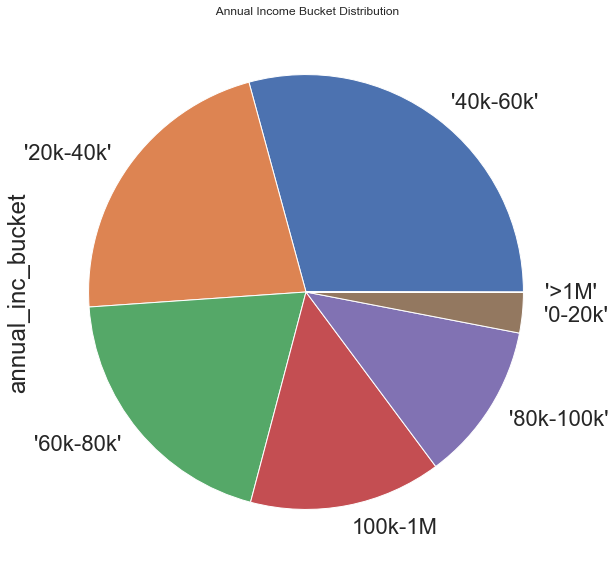

In [57]:
cleaned_loan['annual_inc_bucket'].value_counts().plot.pie(figsize=[20,10])
plt.title(" Annual Income Bucket Distribution" , fontsize=12)
plt.show()

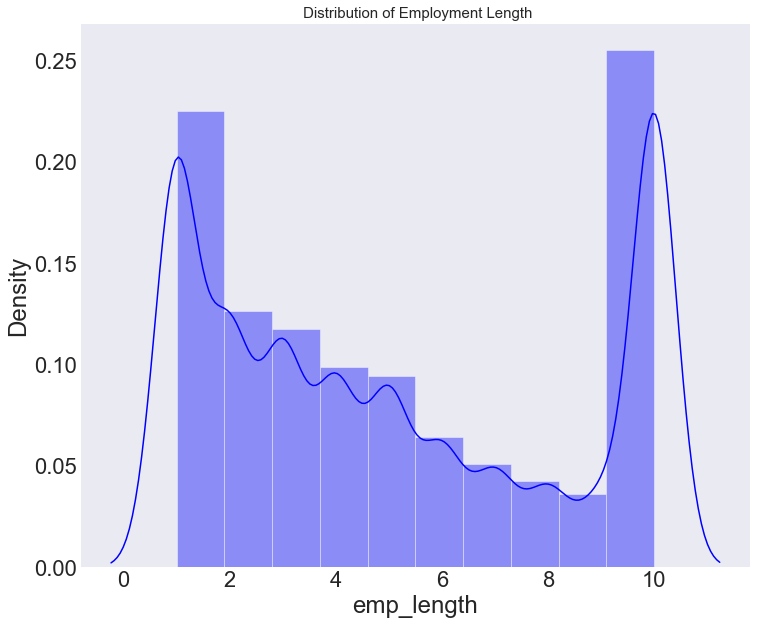

In [58]:
plt.style.use("seaborn-dark")
plt.figure(figsize = (12,10))
sns.distplot(cleaned_loan.emp_length, bins=10 , color='blue')
plt.title(" Distribution of Employment Length" , fontsize=15)
plt.show()

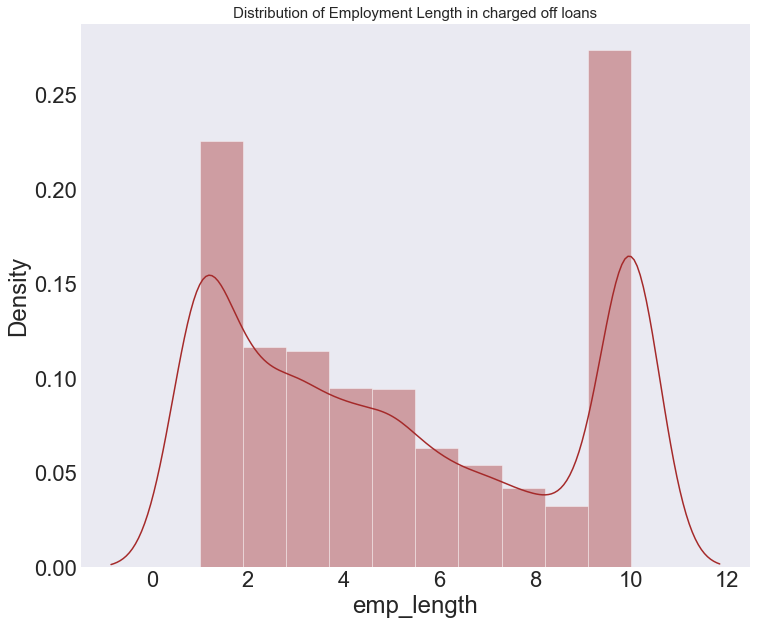

In [59]:
plt.figure(figsize = (12,10))
sns.distplot(chargedoff_loan.emp_length, bins=10 , color='brown')
plt.title(" Distribution of Employment Length in charged off loans " , fontsize=15)
plt.show()
# Almost same pattern  , Employment length has no specific connection to failed to pay loans

## 7)  Bivariate Analysis

## a) Character factors  Analysis for Loan Success / failure ( Delinquency)

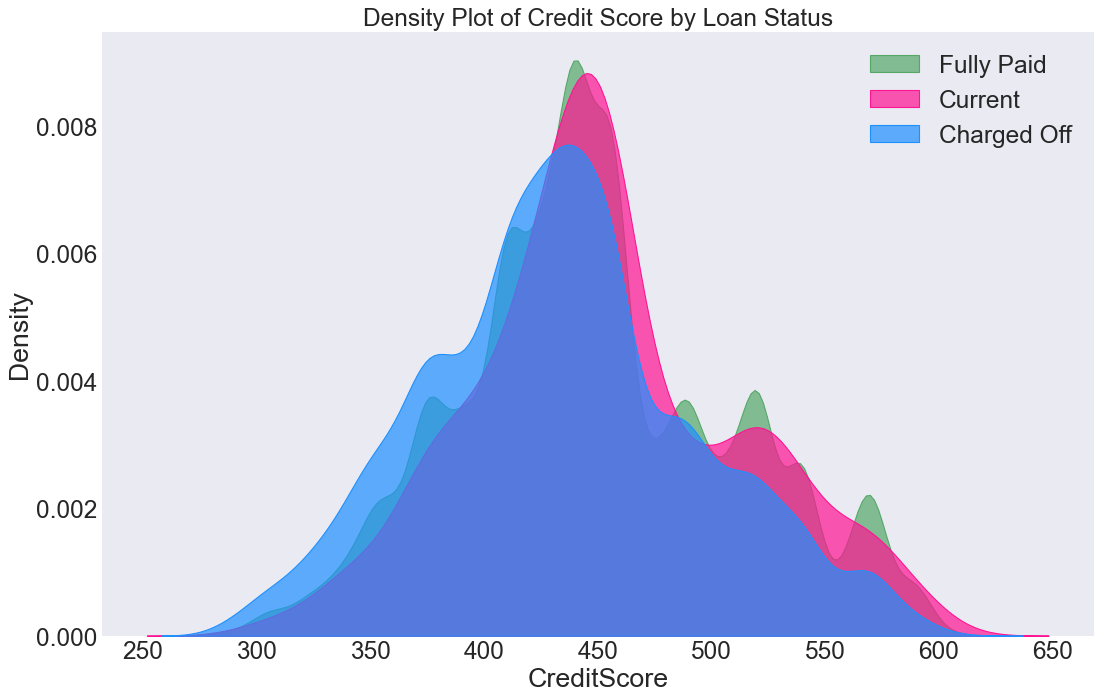

In [60]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Fully Paid", "CreditScore"], shade=True, color="g", label="Fully Paid", alpha=.7)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Current", "CreditScore"], shade=True, color="deeppink", label="Current", alpha=.7)
sns.kdeplot(revised_loan.loc[revised_loan['loan_status'] == "Charged Off", "CreditScore"], shade=True, color="dodgerblue", label="Charged Off", alpha=.7)

# Decoration
plt.title('Density Plot of Credit Score by Loan Status', fontsize=22)
plt.legend()
plt.show()

<Figure size 1760x1200 with 0 Axes>

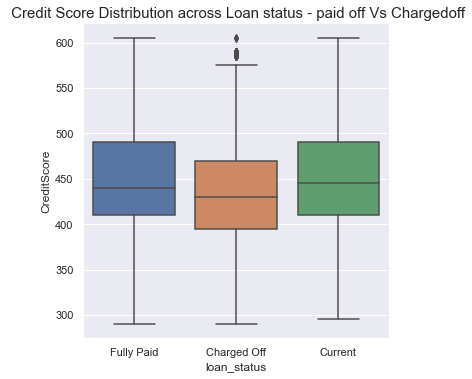

In [61]:
plt.figure(figsize = (22,15),dpi=80)
sns.set(font_scale=1) # font size 1
sns.catplot(x="loan_status", y="CreditScore",
            kind="box", dodge=False, data=revised_loan)
plt.title(" Credit Score Distribution across Loan status - paid off Vs Chargedoff", fontsize=15)
plt.show()

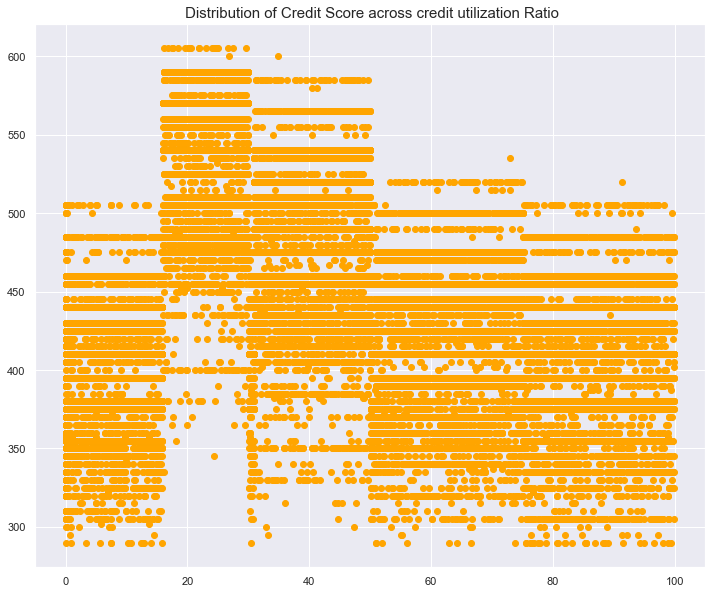

In [62]:
plt.figure(figsize = (12,10))
plt.scatter(revised_loan['creditUtilizationRatio'],revised_loan['CreditScore'],color='Orange')
plt.title(" Distribution of Credit Score across credit utilization Ratio" , fontsize=15)
plt.show()

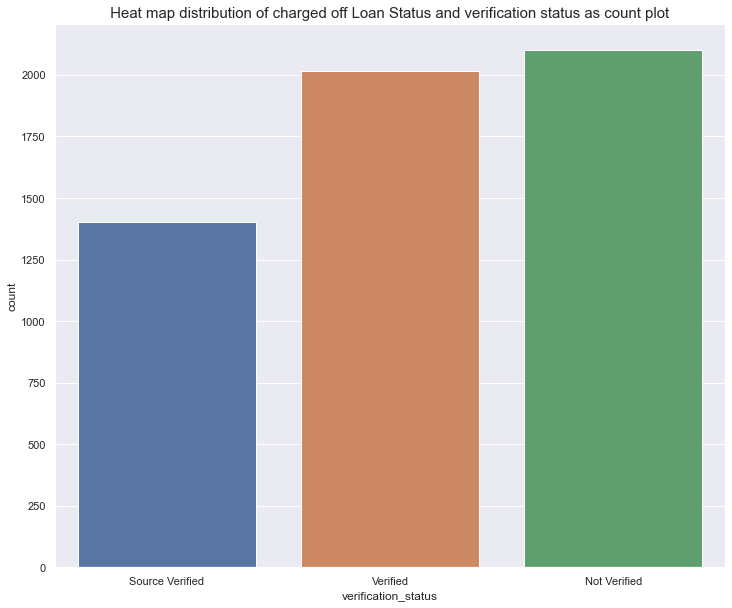

In [63]:
plt.figure(figsize = (12,10))
sns.set(font_scale=1) # font size 2
sns.countplot(x="verification_status",data=revised_chargedOffloan)
plt.title(" Heat map distribution of charged off Loan Status and verification status as count plot " , fontsize=15)
plt.show()

In [64]:
print(chargedoff_loan['addr_state'].value_counts().head(10))
print(cleaned_loan['addr_state'].value_counts().head(10))
# no major connection or correlation seen on state Vs Loan delinquency

CA    1125
FL     504
NY     495
TX     316
NJ     278
GA     215
IL     197
PA     180
VA     177
MD     162
Name: addr_state, dtype: int64
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
Name: addr_state, dtype: int64


## b) Capacity factors Analysis for Loan Success / failure ( Delinquency)

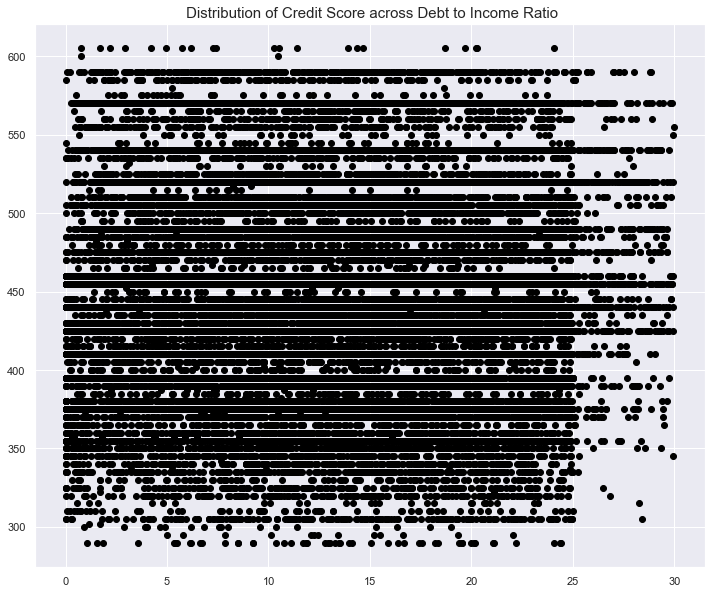

In [65]:
plt.figure(figsize = (12,10))
plt.scatter(revised_loan['debtToIncomeRatio'],revised_loan['CreditScore'],color='black')
plt.title(" Distribution of Credit Score across Debt to Income Ratio" , fontsize=15)
plt.show()

<Figure size 1584x1080 with 0 Axes>

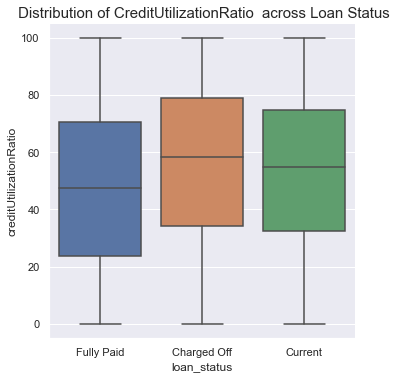

In [66]:
plt.figure(figsize = (22,15))
sns.set(font_scale=1) # font size 1
sns.catplot(x="loan_status", y="creditUtilizationRatio",
            kind="box", dodge=False, data=revised_loan)

plt.title(" Distribution of CreditUtilizationRatio  across Loan Status" , fontsize=15)
plt.show()

<Figure size 1584x1080 with 0 Axes>

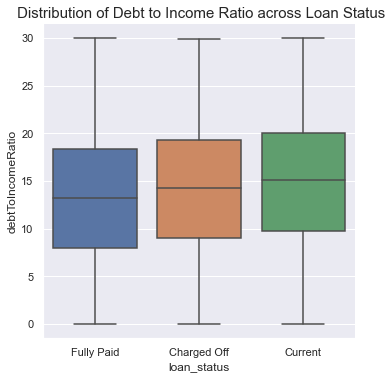

In [67]:
plt.figure(figsize = (22,15))
sns.set(font_scale=1) # font size 1
sns.catplot(x="loan_status", y="debtToIncomeRatio",
            kind="box", dodge=False, data=cleaned_loan)

plt.title(" Distribution of Debt to Income Ratio across Loan Status" , fontsize=15)
plt.show()

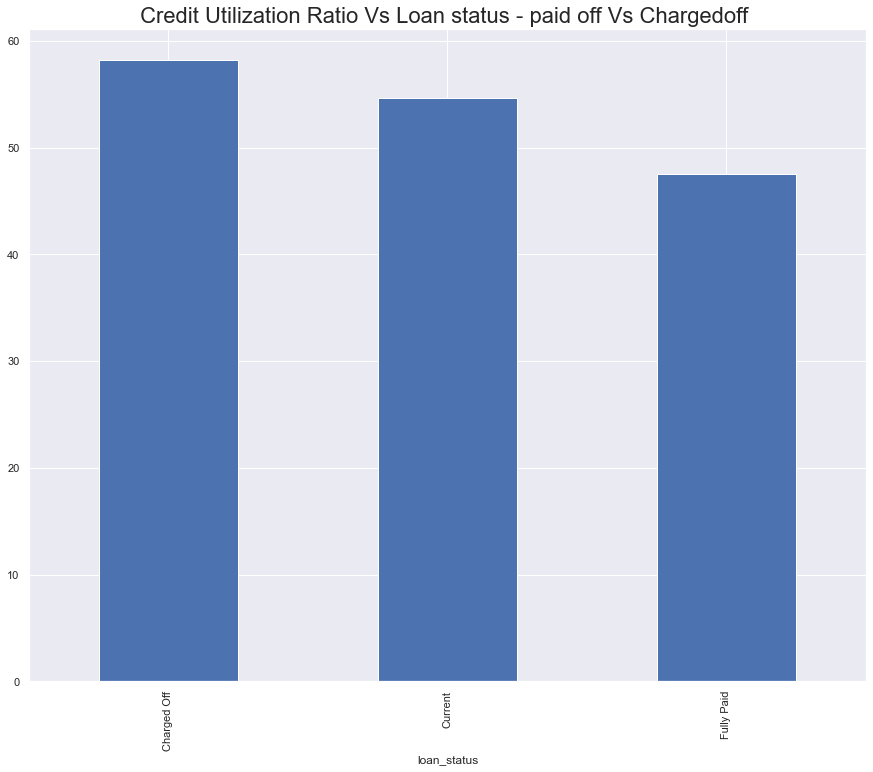

In [68]:
##Plot the bar plot of Loan status with Credit Utlization Score again with Median Score.
sns.set(font_scale=1) # font size 2
revised_loan.groupby(['loan_status'])['creditUtilizationRatio'].median().plot.bar(figsize=[15,12])
plt.title(" Credit Utilization Ratio Vs Loan status - paid off Vs Chargedoff  " , fontsize=22)
plt.show()
# Shows the higher credit utilization Ratio has ,higher case of Charged off 

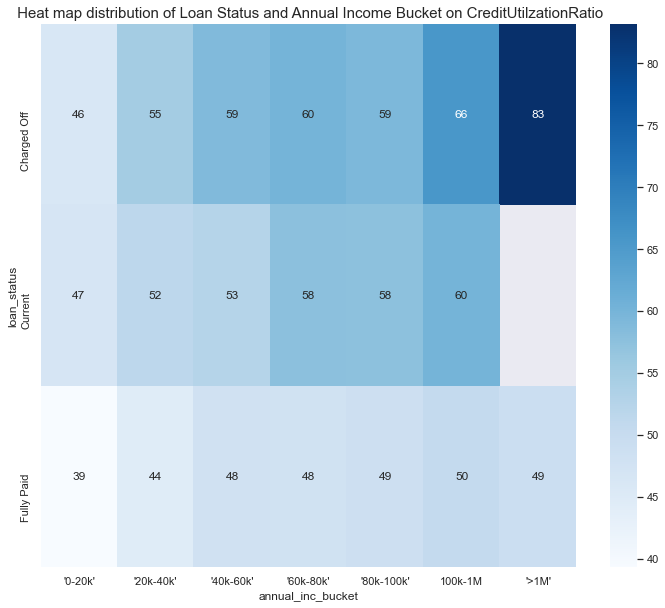

In [69]:
# Pivot Aggregation of Loan status against annual income bucket on Median value of creditUtilizationRation 
plt.figure(figsize = (12,10))
sns.set(font_scale=1) # font size 2
sns.heatmap(pd.pivot_table(revised_loan, index='loan_status', columns='annual_inc_bucket', values='creditUtilizationRatio',aggfunc=np.median),cmap="Blues",annot=True)
plt.title(" Heat map distribution of Loan Status and Annual Income Bucket on CreditUtilzationRatio" , fontsize=15)
plt.show()

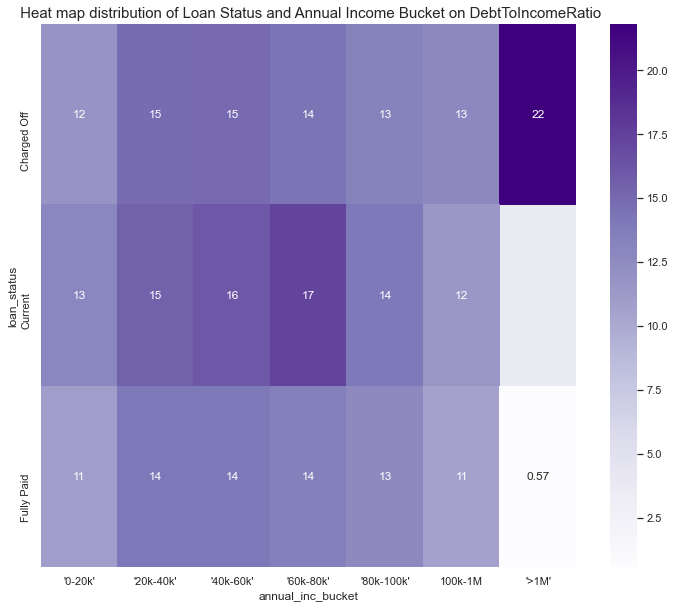

In [70]:
# Pivot Aggregation of Loan status against annual income bucket on Median value of debtToIncomeRatio 
plt.figure(figsize = (12,10))
sns.heatmap(pd.pivot_table(cleaned_loan, index='loan_status', columns='annual_inc_bucket', values='debtToIncomeRatio',aggfunc=np.median),cmap="Purples",annot=True)
plt.title(" Heat map distribution of Loan Status and Annual Income Bucket on DebtToIncomeRatio" , fontsize=15)
plt.show()

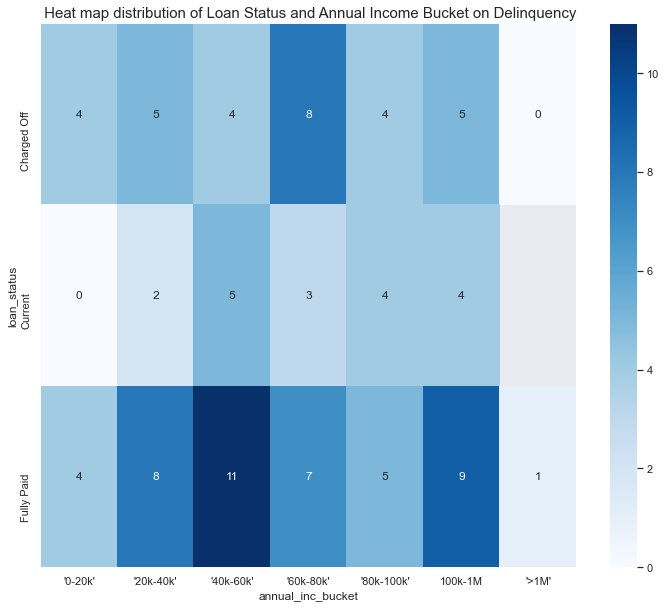

In [71]:
# Pivot Aggregation of Loan status against annual income bucket on Max value of 30+days delinquency
plt.figure(figsize = (12,10))
sns.heatmap(pd.pivot_table(cleaned_loan, index='loan_status', columns='annual_inc_bucket', values='delinq_2yrs',aggfunc=np.max),cmap="Blues",annot=True)
plt.title(" Heat map distribution of Loan Status and Annual Income Bucket on Delinquency" , fontsize=15)
plt.show()

<Figure size 1800x1800 with 0 Axes>

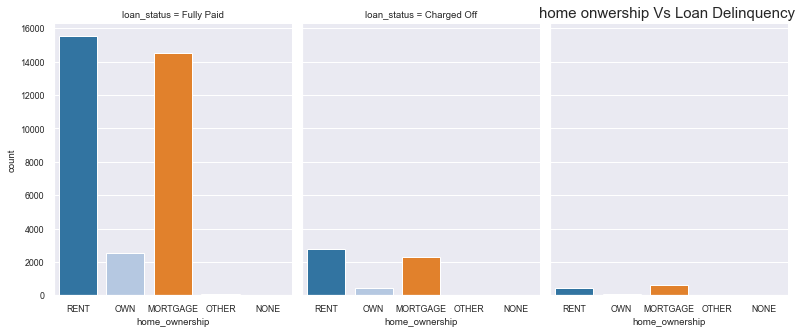

In [72]:
plt.figure(figsize = (25,25))
sns.set(font_scale=0.8) 
g = sns.catplot("home_ownership", col="loan_status", col_wrap=4,
                data=revised_loan,
                kind="count", height=4.5, aspect=.8, 
                palette='tab20')
plt.title("home onwership Vs Loan Delinquency " , fontsize=15)
plt.show()

## c) Condition factors Analysis for Loan Success / failure ( Delinquency)

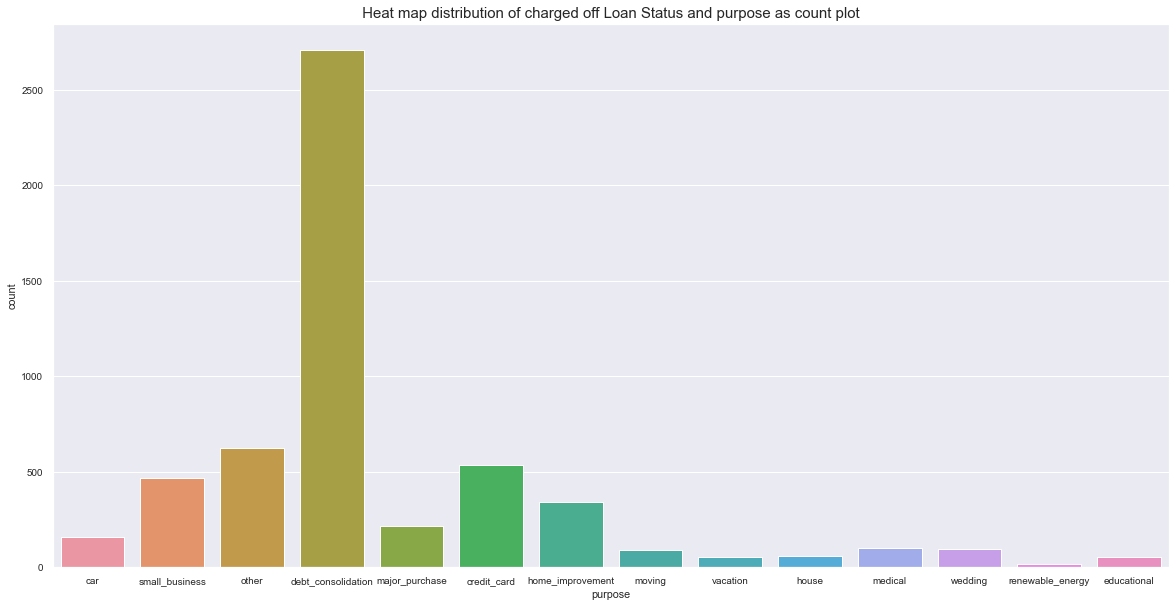

In [73]:
plt.figure(figsize = (20,10))
sns.set(font_scale=0.9) # font size 0.9
sns.countplot(x="purpose",data=revised_chargedOffloan)
plt.title(" Heat map distribution of charged off Loan Status and purpose as count plot " , fontsize=15)
plt.show()
sns.set(font_scale=2) # font size 2

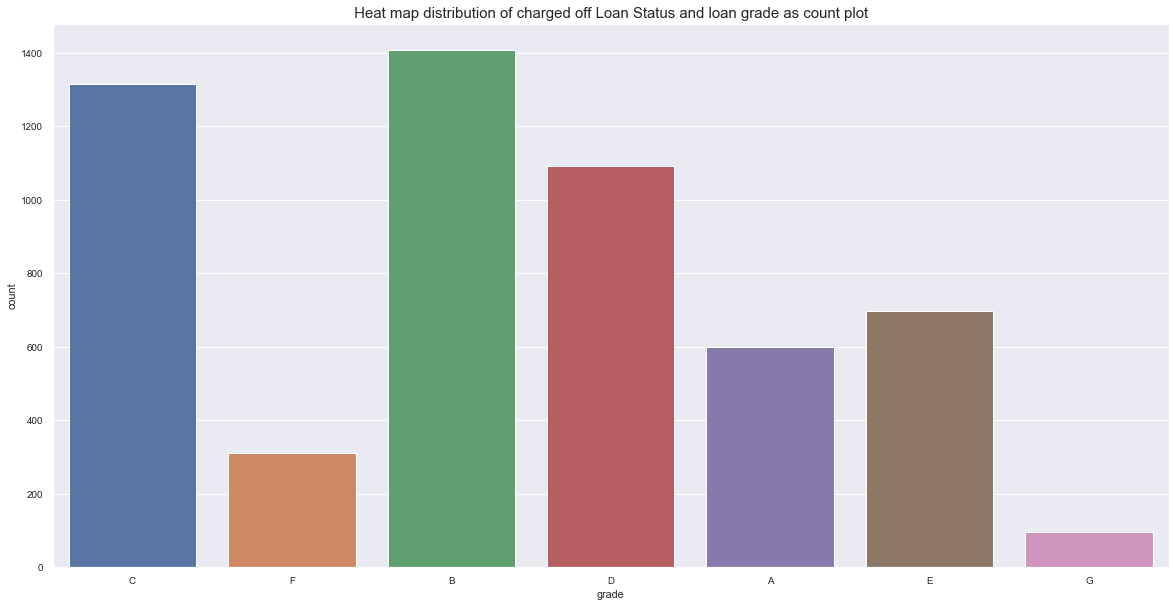

In [74]:
plt.figure(figsize = (20,10))
sns.set(font_scale=0.9) # font size 0.9
sns.countplot(x="grade",data=revised_chargedOffloan)
plt.title(" Heat map distribution of charged off Loan Status and loan grade as count plot " , fontsize=15)
plt.show()
sns.set(font_scale=2) # font size 2

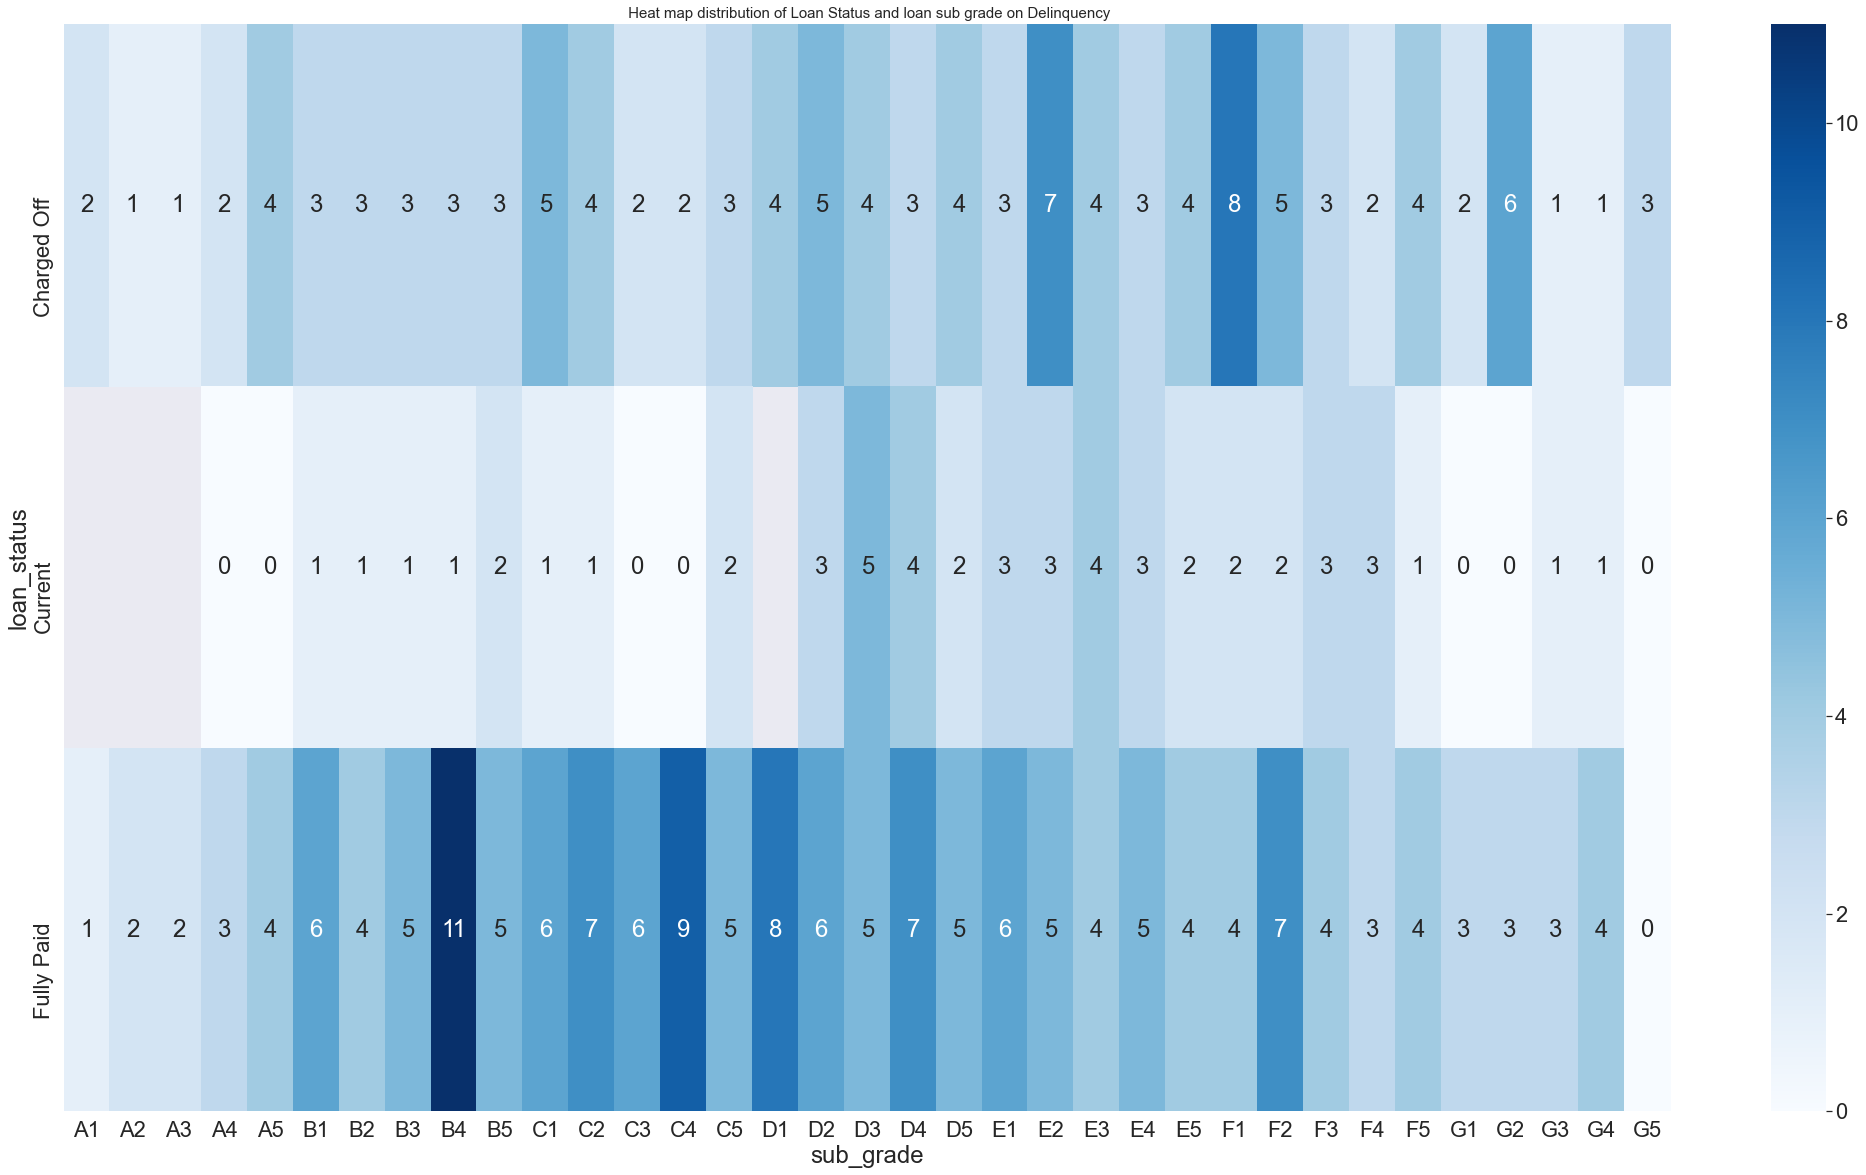

In [75]:
# Pivot Aggregation of Loan status against loan sub grade on Max value of 30+days delinquency
plt.figure(figsize = (36,20))
sns.heatmap(pd.pivot_table(cleaned_loan, index='loan_status', columns='sub_grade', values='delinq_2yrs',aggfunc=np.max),cmap="Blues",annot=True)
sns.set(font_scale=4) # font size 2
plt.title(" Heat map distribution of Loan Status and loan sub grade on Delinquency" , fontsize=15)
plt.show()

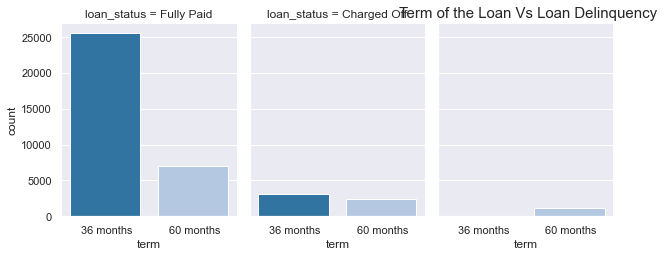

In [76]:
# Plot
sns.set(font_scale=1) # font size 2
g = sns.catplot("term", col="loan_status", col_wrap=4,
                data=revised_loan,
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

plt.title("  Term of the Loan Vs Loan Delinquency " , fontsize=15)
plt.show()

## Loan recovery amount analysis on Charged off Loans 

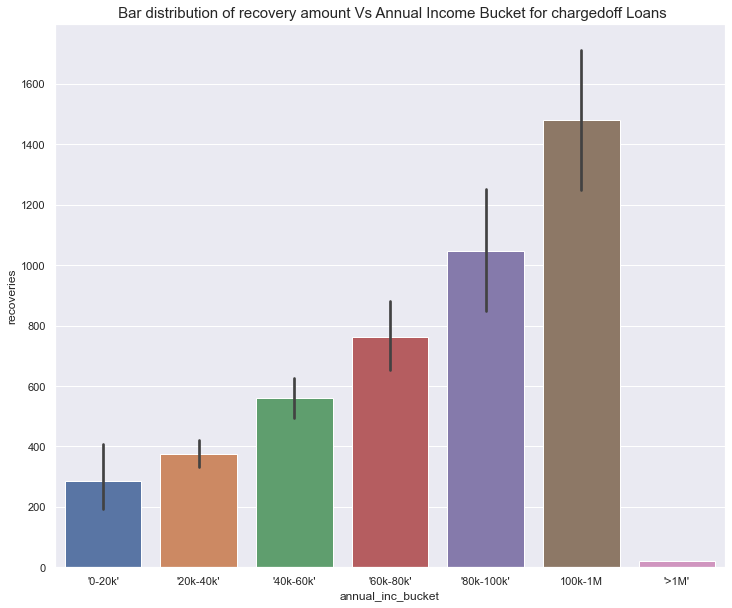

In [77]:
plt.figure(figsize = (12,10))
sns.set(font_scale=1) # font size 1
sns.barplot(data=revised_chargedOffloan,x="annual_inc_bucket",y="recoveries")
plt.title(" Bar distribution of recovery amount Vs Annual Income Bucket for chargedoff Loans" , fontsize=15)
plt.show()

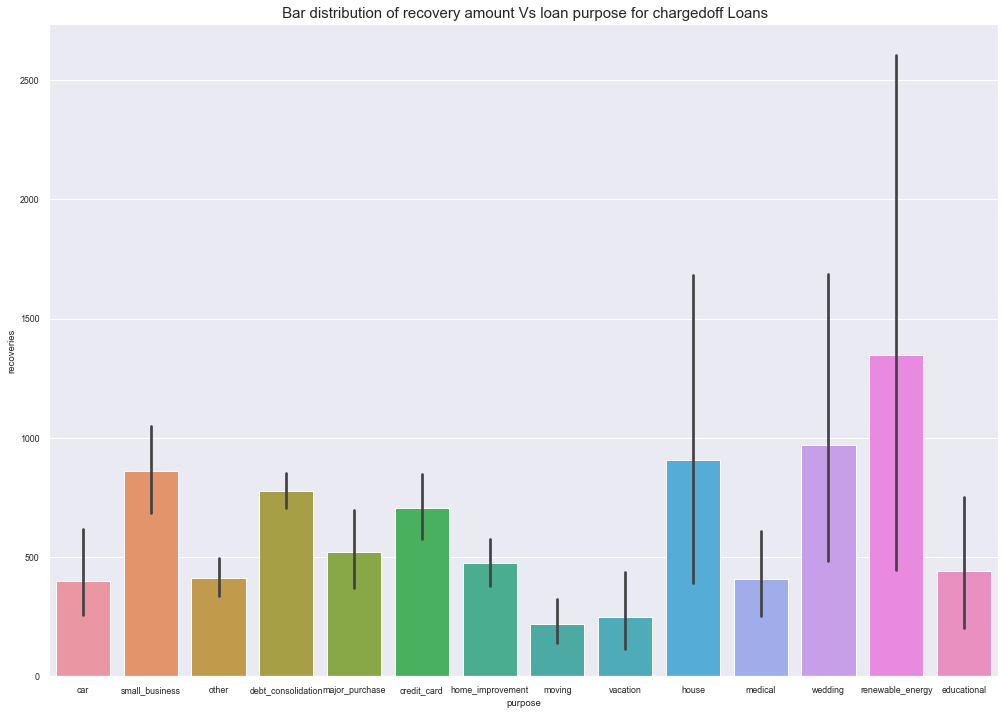

In [78]:
plt.figure(figsize = (17,12))
sns.set(font_scale=0.8) # font size 1
sns.barplot(data=revised_chargedOffloan,x="purpose",y="recoveries")
plt.title(" Bar distribution of recovery amount Vs loan purpose for chargedoff Loans" , fontsize=15)
plt.show()

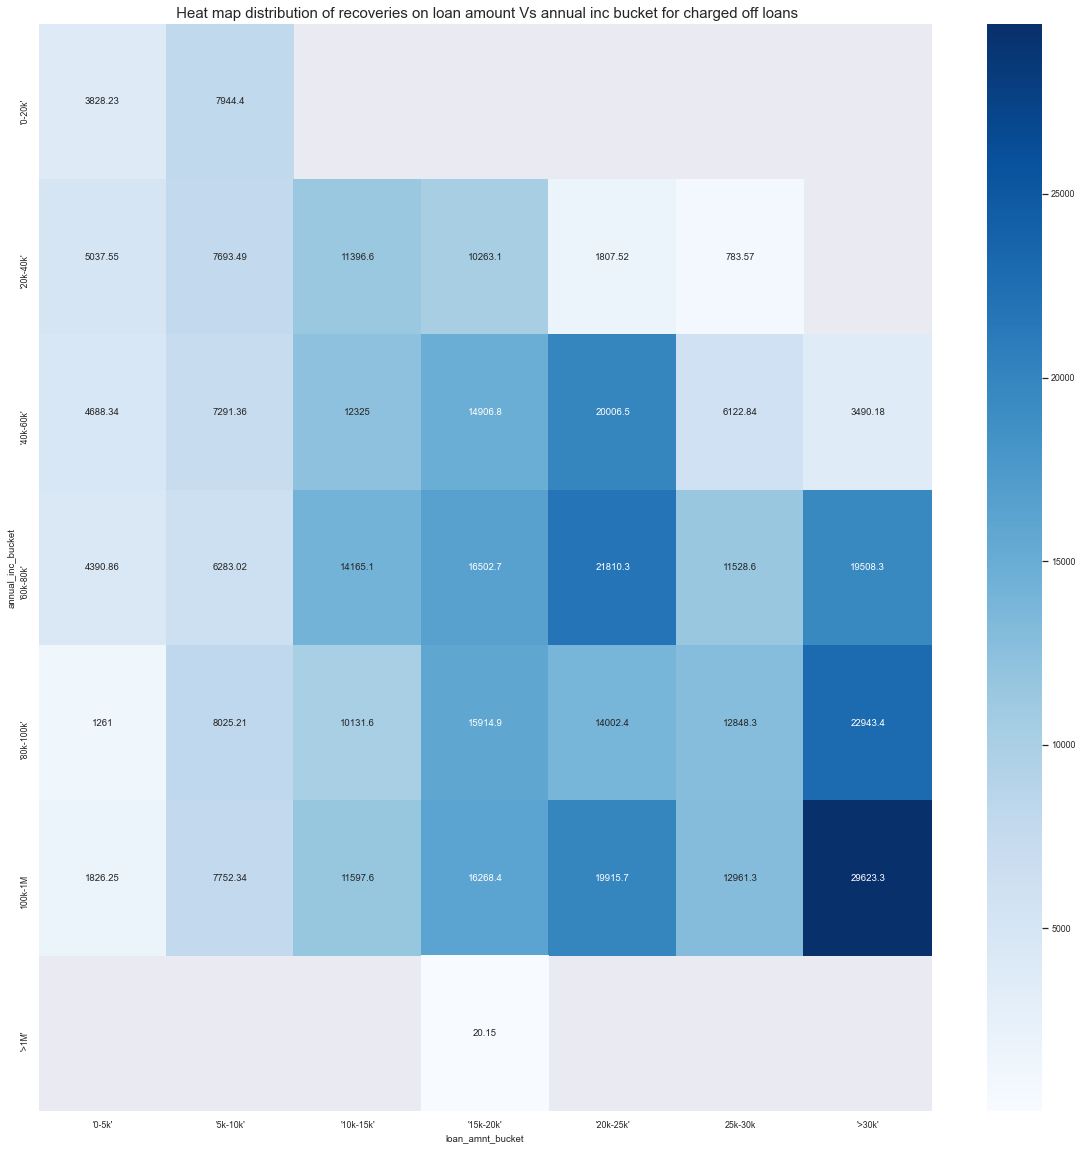

In [79]:
# Pivot Aggregation of loan amount against annual_inc_bucket on max value of recoveries
plt.figure(figsize = (20,20))
sns.heatmap(pd.pivot_table(revised_chargedOffloan, index='annual_inc_bucket', columns='loan_amnt_bucket', values='recoveries',aggfunc=np.max),cmap="Blues",annot=True,fmt='g')
sns.set(font_scale=1) # font size 2
plt.title(" Heat map distribution of recoveries on loan amount Vs annual inc bucket for charged off loans" , fontsize=15)
plt.show()